In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test=pd.read_csv('test_kaggle.csv')

In [3]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [4]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [6]:
for i in test.columns:
    if(test[i].isnull().sum()!=0):
        print(i,": ",test[i].isnull().sum())

MSZoning :  4
LotFrontage :  227
Alley :  1352
Utilities :  2
Exterior1st :  1
Exterior2nd :  1
MasVnrType :  16
MasVnrArea :  15
BsmtQual :  44
BsmtCond :  45
BsmtExposure :  44
BsmtFinType1 :  42
BsmtFinSF1 :  1
BsmtFinType2 :  42
BsmtFinSF2 :  1
BsmtUnfSF :  1
TotalBsmtSF :  1
BsmtFullBath :  2
BsmtHalfBath :  2
KitchenQual :  1
Functional :  2
FireplaceQu :  730
GarageType :  76
GarageYrBlt :  78
GarageFinish :  78
GarageCars :  1
GarageArea :  1
GarageQual :  78
GarageCond :  78
PoolQC :  1456
Fence :  1169
MiscFeature :  1408
SaleType :  1


In [7]:
# lots of missing value in the test data

In [10]:
test['LotFrontage'].value_counts(),test['MSZoning'].value_counts()

(68.580357     227
 60.000000     133
 80.000000      68
 70.000000      63
 50.000000      60
              ... 
 117.000000      1
 31.000000       1
 119.000000      1
 25.000000       1
 140.000000      1
 Name: LotFrontage, Length: 116, dtype: int64,
 RL         1114
 RM          242
 FV           74
 C (all)      15
 RH           10
 Name: MSZoning, dtype: int64)

In [11]:
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

In [12]:
for i in test.columns:
    if((((len(test) - test[i].value_counts().sum()))*100/(len(test)))>90):
        print(i)

Alley
PoolQC
MiscFeature


In [14]:
test.drop(['Alley'],axis=1,inplace=True)

In [24]:
test.drop(['Id'],axis=1,inplace=True)

In [17]:
test['BsmtCond'].value_counts(),test['BsmtCond'].value_counts(),test['BsmtExposure'].value_counts()

(TA    1295
 Fa      59
 Gd      57
 Po       3
 Name: BsmtCond, dtype: int64,
 TA    1295
 Fa      59
 Gd      57
 Po       3
 Name: BsmtCond, dtype: int64,
 No    951
 Av    197
 Gd    142
 Mn    125
 Name: BsmtExposure, dtype: int64)

In [19]:
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

In [20]:
test['FireplaceQu'].value_counts(),test['GarageArea'].value_counts(),test['GarageType'].value_counts()

(Gd    364
 TA    279
 Fa     41
 Po     26
 Ex     19
 Name: FireplaceQu, dtype: int64,
 0.0       76
 576.0     50
 440.0     47
 484.0     34
 400.0     33
           ..
 453.0      1
 1348.0     1
 567.0      1
 811.0      1
 682.0      1
 Name: GarageArea, Length: 459, dtype: int64,
 Attchd     853
 Detchd     392
 BuiltIn     98
 Basment     17
 2Types      17
 CarPort      6
 Name: GarageType, dtype: int64)

In [21]:
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])

In [22]:
test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [23]:
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [25]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [27]:
test['MasVnrType'].value_counts(),test['MasVnrArea'].value_counts(),

(None       894
 BrkFace    434
 Stone      121
 BrkCmn      10
 Name: MasVnrType, dtype: int64,
 0.0       892
 176.0      10
 144.0       9
 120.0       8
 216.0       8
          ... 
 647.0       1
 1290.0      1
 495.0       1
 292.0       1
 382.0       1
 Name: MasVnrArea, Length: 303, dtype: int64)

In [28]:
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

<AxesSubplot: >

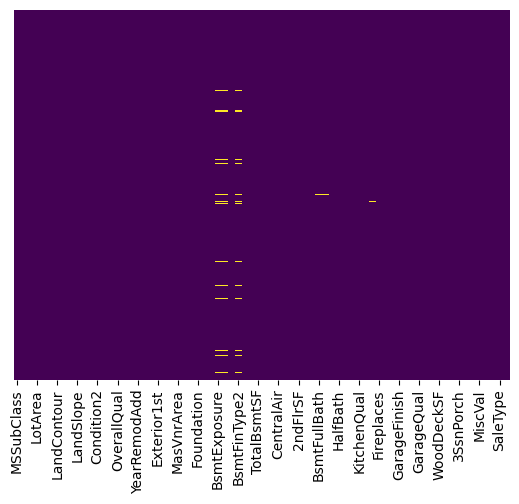

In [29]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [30]:
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])

In [37]:
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mean())
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean())
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea']=test['GarageArea'].fillna(test['GarageArea'].mean())
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [40]:
test.to_csv('formulatedtest.csv',index=False)